**Nama: Muhammad Erlangga Arsadi**

**NIM: 1301204346**

# **1. Import Library yang dibutuhkan**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D,BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import cv2
import time

np.random.seed(1)

# **2. Pengumpulan dan Preproses Data**

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

In [8]:
import zipfile
zip_file_path = '/content/archive.zip'
extracted_dir = '/content'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

target_shape = (200,200)
train_imgs = []
train_labels = []
train_file = './train_zip/train'

for file in os.listdir(train_file):
    # jika file berupa jpg berarti adalah file gambar
    if file.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_file,file))
        # konversi gambar menjadi rgb
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        # menambahkan label
        train_labels.append(file.split('_')[0])
        # resize gambar
        img = cv2.resize(img,target_shape)
        train_imgs.append(img)

train_labels = pd.get_dummies(train_labels).values
train_imgs = np.array(train_imgs)

# data splitting menjadi data train dan data valid
x_train,x_valid,y_train,y_valid = train_test_split(train_imgs,train_labels,random_state=1,test_size=0.2)

In [9]:
test_imgs = []
test_labels = []
test_file = "./test_zip/test"

for file in os.listdir(test_file):
    if file.split(".")[1] == "jpg":
        # jika file berupa jpg berarti adalah file gambar
        img = cv2.imread(os.path.join(test_file,file))
        # konversi gambar menjadi rgb
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        # menambahkan label
        test_labels.append(file.split("_")[0])
        img = cv2.resize(img,target_shape)
        test_imgs.append(img)

test_labels = pd.get_dummies(test_labels).values
test_imgs = np.array(test_imgs)

# **3. Pembuatan Model**

In [10]:
# membuat arsitektur model
model = Sequential()

model.add(Conv2D(kernel_size=(3,3),filters=16,activation='relu',input_shape=(200,200,3,)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(kernel_size=(3,3),filters=16,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(kernel_size=(3,3),filters=16,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 198, 198, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 16)        2320      
                                                                 
 batch_normalization_1 (Bat  (None, 97, 97, 16)        64        
 chNormalization)                                                
                                                        

In [11]:
# compile model menggunakan optimizer ADAM dan loss crossentropy
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# **4. Pelatihan Model**

In [12]:
# melakukan model training
epochs = 50
batch_size = 50

start = time.time()

trained_model = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_valid,y_valid))

total_time = time.time() - start

print("Model trained in {:.4f} sec".format(total_time))

Epoch 1/50
4/4 [==============================] - 11s 2s/step - loss: 1.5398 - accuracy: 0.4635 - val_loss: 2.5307 - val_accuracy: 0.3125
Epoch 2/50
4/4 [==============================] - 7s 2s/step - loss: 0.5080 - accuracy: 0.7969 - val_loss: 4.1302 - val_accuracy: 0.3125
Epoch 3/50
4/4 [==============================] - 8s 2s/step - loss: 0.4172 - accuracy: 0.8229 - val_loss: 3.3613 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 7s 2s/step - loss: 0.1555 - accuracy: 0.9375 - val_loss: 2.8522 - val_accuracy: 0.4167
Epoch 5/50
4/4 [==============================] - 8s 2s/step - loss: 0.0827 - accuracy: 0.9792 - val_loss: 2.7958 - val_accuracy: 0.3958
Epoch 6/50
4/4 [==============================] - 7s 2s/step - loss: 0.0485 - accuracy: 0.9948 - val_loss: 2.8140 - val_accuracy: 0.3750
Epoch 7/50
4/4 [==============================] - 11s 3s/step - loss: 0.0719 - accuracy: 0.9948 - val_loss: 3.6164 - val_accuracy: 0.3958
Epoch 8/50
4/4 [=======================

# **5. Evaluasi Model**

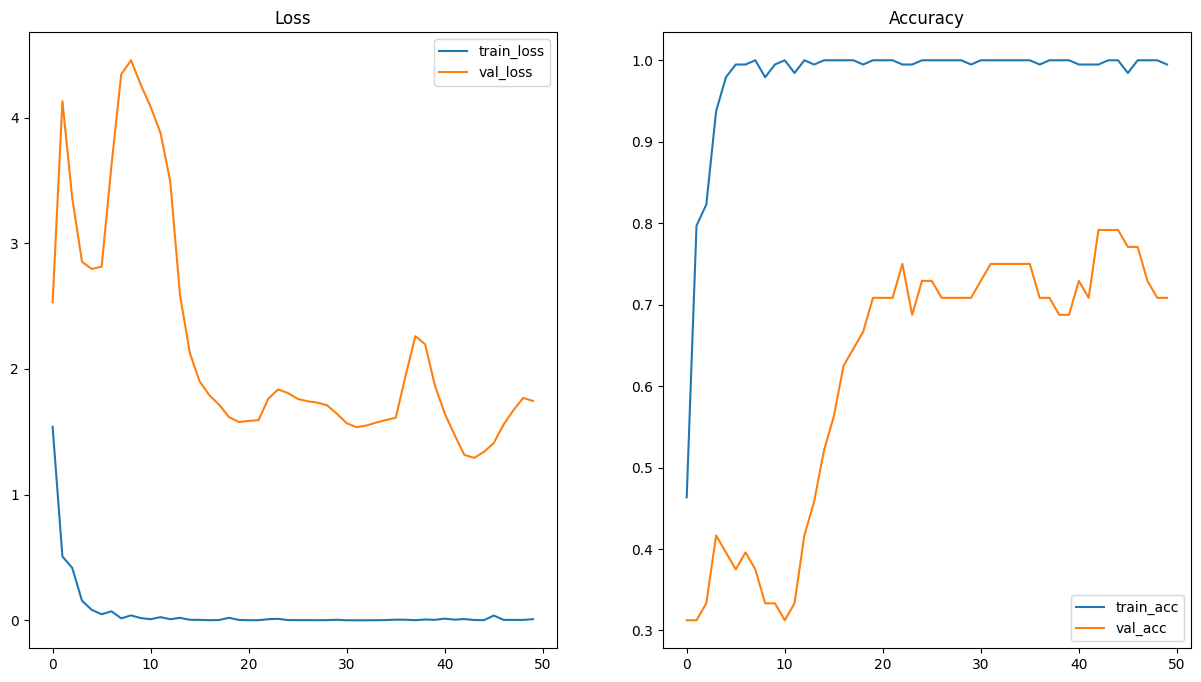

In [13]:
# plotting kerugian/loss beserta akurasi untuk tiap fase
train_loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
train_acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,train_loss,label="train_loss")
plt.plot(epochs_range,val_loss,label="val_loss")
plt.legend(loc=0)
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(epochs_range,train_acc,label="train_acc")
plt.plot(epochs_range,val_acc,label="val_acc")
plt.legend(loc=0)
plt.title("Accuracy")

plt.show()

In [14]:
# melakukan model testing pada data test
model.evaluate(test_imgs,test_labels)

2/2 [==============================] - 1s 273ms/step - loss: 1.4885 - accuracy: 0.6833


[1.488518238067627, 0.6833333373069763]